# 1 - Introduction

This notebook train four different neural network models. They are all pretty similar.

## 1.1 Load Packages and Global Variables

In [55]:
%matplotlib inline
import os
import numpy as np
import nltk
import pandas as pd
from sklearn.externals import joblib
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from nltk import wordpunct_tokenize

In [2]:
PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
os.chdir(PROJECT_DIR)

In [3]:
os.getcwd()

'C:\\Users\\wertu\\Documents\\Datascience\\udacity-ml-capstone'

In [4]:
import src.neural_networks as nn
from src.evaluation import roc_plot

In [5]:
from importlib import reload
nn = reload(nn)

## 1.2- Load the Data

Load the train and validation neural network data sets if they are present, otherwise raise an exception.

In [6]:
#Load sequnces
try:
    train = joblib.load('data/processed/train_nn.pkl')
    valid = joblib.load('data/processed/valid_nn.pkl')
    test = joblib.load('data/processed/test_nn.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [7]:
#Load embedding matrix of 50 dimensions
try:
    embedding_matrix50 = joblib.load('data/interim/embeddings50.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [8]:
#Load embedding matrix of 300 dimensions
try:
    embedding_matrix300 = joblib.load('data/interim/embeddings300.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [9]:
#these arguments will be the same when training both models
run_args = {"train":(train["seqs"],train["labels"]),
            "valid":(valid["seqs"],valid["labels"])}

# 2 - Train 50d model with fixed embeddings

In [13]:
#LSTM, average final
model50_fixed = nn.create_model(embedding_matrix=embedding_matrix50, n_hidden=150, train_embed=False)
model50_fixed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           1369800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 50)           0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 50)           0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 50)           0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               120600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [14]:
#output model as svg plot
plot_model(model50_fixed, to_file='reports/figures/nn_50d.svg', show_shapes =True)

In [15]:
%%time
#now train
history50_fixed = nn.run_model(model=model50_fixed, out_path="models/nn_50d_fixed.hdf5", **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6726 - acc: 0.5767
auc: 64.3588% - val_auc: 64.5214% 

Epoch 00001: val_auc improved from -inf to 0.64521, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 203s 1ms/step - loss: 0.6726 - acc: 0.5768 - val_loss: 0.6573 - val_acc: 0.6029
Epoch 2/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6621 - acc: 0.5952
auc: 64.8983% - val_auc: 65.0197% 

Epoch 00002: val_auc improved from 0.64521 to 0.65020, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 154s 894us/step - loss: 0.6620 - acc: 0.5952 - val_loss: 0.6543 - val_acc: 0.6019
Epoch 3/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6578 - acc: 0.5980
auc: 65.2484% - val_auc: 65.3539% 

Epoch 00003: val_auc improved from 0.65020 to 0.65354, saving model to models/nn_50d_fixed.hdf5

Epoch 24/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6387 - acc: 0.6285
auc: 69.6013% - val_auc: 69.1988% 

Epoch 00024: val_auc improved from 0.69160 to 0.69199, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 867us/step - loss: 0.6387 - acc: 0.6285 - val_loss: 0.6331 - val_acc: 0.6374
Epoch 25/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6382 - acc: 0.6308
auc: 69.8402% - val_auc: 69.3207% 

Epoch 00025: val_auc improved from 0.69199 to 0.69321, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 866us/step - loss: 0.6381 - acc: 0.6308 - val_loss: 0.6327 - val_acc: 0.6377
Epoch 26/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6375 - acc: 0.6305
auc: 69.9474% - val_auc: 69.4143% 

Epoch 00026: val_auc improved from 0.69321 to 0.69414, saving model to models/nn_50d_fixed.hdf5
171945/171945 [===========================

Epoch 47/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6280 - acc: 0.6442
auc: 72.4031% - val_auc: 70.9003% 

Epoch 00047: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6279 - acc: 0.6443 - val_loss: 0.6219 - val_acc: 0.6531
Epoch 48/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6275 - acc: 0.6450
auc: 72.6971% - val_auc: 71.0530% 

Epoch 00048: val_auc improved from 0.70939 to 0.71053, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 865us/step - loss: 0.6275 - acc: 0.6452 - val_loss: 0.6216 - val_acc: 0.6514
Epoch 49/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6274 - acc: 0.6457
auc: 72.7362% - val_auc: 71.1109% 

Epoch 00049: val_auc improved from 0.71053 to 0.71111, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 868us/step - loss: 0.6273 - acc: 0.6458 - val_l

Epoch 71/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6194 - acc: 0.6556
auc: 74.5669% - val_auc: 71.7253% 

Epoch 00071: val_auc did not improve
171945/171945 [==============================] - 149s 865us/step - loss: 0.6193 - acc: 0.6558 - val_loss: 0.6174 - val_acc: 0.6529
Epoch 72/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6198 - acc: 0.6527
auc: 74.6314% - val_auc: 71.8800% 

Epoch 00072: val_auc improved from 0.71845 to 0.71880, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 866us/step - loss: 0.6197 - acc: 0.6529 - val_loss: 0.6162 - val_acc: 0.6564
Epoch 73/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6186 - acc: 0.6568
auc: 74.7706% - val_auc: 71.8892% 

Epoch 00073: val_auc improved from 0.71880 to 0.71889, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 868us/step - loss: 0.6186 - acc: 0.6567 - val_l

Epoch 95/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6136 - acc: 0.6613
auc: 76.1158% - val_auc: 72.2926% 

Epoch 00095: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6135 - acc: 0.6614 - val_loss: 0.6141 - val_acc: 0.6571
Epoch 96/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6137 - acc: 0.6607
auc: 76.1594% - val_auc: 72.4189% 

Epoch 00096: val_auc improved from 0.72361 to 0.72419, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 867us/step - loss: 0.6137 - acc: 0.6608 - val_loss: 0.6121 - val_acc: 0.6604
Epoch 97/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6133 - acc: 0.6619
auc: 76.2176% - val_auc: 72.3839% 

Epoch 00097: val_auc did not improve
171945/171945 [==============================] - 149s 867us/step - loss: 0.6131 - acc: 0.6620 - val_loss: 0.6136 - val_acc: 0.6565
Epoch 98/1000
170000/171945 [

Epoch 120/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6096 - acc: 0.6655
auc: 77.3082% - val_auc: 72.5978% 

Epoch 00120: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6098 - acc: 0.6652 - val_loss: 0.6125 - val_acc: 0.6593
Epoch 121/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6089 - acc: 0.6675
auc: 77.4617% - val_auc: 72.6077% 

Epoch 00121: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6088 - acc: 0.6676 - val_loss: 0.6108 - val_acc: 0.6607
Epoch 122/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6100 - acc: 0.6663
auc: 77.4117% - val_auc: 72.6692% 

Epoch 00122: val_auc improved from 0.72622 to 0.72669, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 868us/step - loss: 0.6098 - acc: 0.6665 - val_loss: 0.6102 - val_acc: 0.6624
Epoch 123/1000
170000/1719

Epoch 146/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6063 - acc: 0.6705
auc: 78.2495% - val_auc: 72.8523% 

Epoch 00146: val_auc did not improve
171945/171945 [==============================] - 149s 867us/step - loss: 0.6064 - acc: 0.6703 - val_loss: 0.6094 - val_acc: 0.6629
Epoch 147/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6067 - acc: 0.6689
auc: 78.2188% - val_auc: 72.8394% 

Epoch 00147: val_auc did not improve
171945/171945 [==============================] - 149s 868us/step - loss: 0.6066 - acc: 0.6692 - val_loss: 0.6106 - val_acc: 0.6616
Epoch 148/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6048 - acc: 0.6706
auc: 78.2541% - val_auc: 72.7842% 

Epoch 00148: val_auc did not improve
171945/171945 [==============================] - 149s 867us/step - loss: 0.6049 - acc: 0.6705 - val_loss: 0.6117 - val_acc: 0.6615
Epoch 149/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.605

Epoch 173/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6027 - acc: 0.6744
auc: 78.9370% - val_auc: 72.8418% 

Epoch 00173: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6026 - acc: 0.6744 - val_loss: 0.6118 - val_acc: 0.6620
Epoch 174/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6036 - acc: 0.6731
auc: 79.0096% - val_auc: 72.8533% 

Epoch 00174: val_auc did not improve
171945/171945 [==============================] - 149s 865us/step - loss: 0.6036 - acc: 0.6731 - val_loss: 0.6106 - val_acc: 0.6624
Epoch 175/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6031 - acc: 0.6732
auc: 79.0807% - val_auc: 72.8713% 

Epoch 00175: val_auc did not improve
171945/171945 [==============================] - 149s 868us/step - loss: 0.6031 - acc: 0.6732 - val_loss: 0.6100 - val_acc: 0.6618
Epoch 176/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.603

Epoch 199/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6010 - acc: 0.6748
auc: 79.5986% - val_auc: 72.9090% 

Epoch 00199: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6010 - acc: 0.6747 - val_loss: 0.6126 - val_acc: 0.6619
Epoch 200/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6011 - acc: 0.6747
auc: 79.6429% - val_auc: 72.9597% 

Epoch 00200: val_auc improved from 0.72957 to 0.72960, saving model to models/nn_50d_fixed.hdf5
171945/171945 [==============================] - 149s 867us/step - loss: 0.6010 - acc: 0.6747 - val_loss: 0.6105 - val_acc: 0.6624
Epoch 201/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6008 - acc: 0.6742
auc: 79.5771% - val_auc: 72.8218% 

Epoch 00201: val_auc did not improve
171945/171945 [==============================] - 149s 866us/step - loss: 0.6008 - acc: 0.6742 - val_loss: 0.6131 - val_acc: 0.6597
Epoch 202/1000
170000/1719

Epoch 252/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5972 - acc: 0.6796
auc: 80.4466% - val_auc: 72.9831% 

Epoch 00252: val_auc did not improve
171945/171945 [==============================] - 152s 885us/step - loss: 0.5971 - acc: 0.6796 - val_loss: 0.6133 - val_acc: 0.6619
Epoch 253/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5971 - acc: 0.6794
auc: 80.4385% - val_auc: 73.1233% 

Epoch 00253: val_auc did not improve
171945/171945 [==============================] - 152s 882us/step - loss: 0.5970 - acc: 0.6793 - val_loss: 0.6103 - val_acc: 0.6640
Epoch 254/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5981 - acc: 0.6783
auc: 80.4669% - val_auc: 73.0705% 

Epoch 00254: val_auc did not improve
171945/171945 [==============================] - 151s 879us/step - loss: 0.5980 - acc: 0.6784 - val_loss: 0.6110 - val_acc: 0.6621
Epoch 255/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.596

In [43]:
#save history
joblib.dump(model50_fixed.history.history, "data/interim/nn50_fixed_history.pkl")

['data/interim/nn50_fixed_history.pkl']

# 3 - Train 300d model with fixed embeddings

Second model 300 dimensionhal word embeddings. However the number of hidden units is decreases in order mtianta  aprocaml the same number of trainable paramters.

In [16]:
#LSTM, average final
model300_fixed = nn.create_model(embedding_matrix=embedding_matrix300, n_hidden=150)
model300_fixed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 300)          8218800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 300)          0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 300)          0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 300)          0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               270600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [17]:
%%time
#now train
history300_fixed = nn.run_model(model=model300_fixed, out_path="models/nn_300d_fixed.hdf5", **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6650 - acc: 0.5908
auc: 66.1044% - val_auc: 65.8528% 

Epoch 00001: val_auc improved from -inf to 0.65853, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 218s 1ms/step - loss: 0.6649 - acc: 0.5910 - val_loss: 0.6533 - val_acc: 0.6070
Epoch 2/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6544 - acc: 0.6077
auc: 67.5849% - val_auc: 67.5304% 

Epoch 00002: val_auc improved from 0.65853 to 0.67530, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 165s 962us/step - loss: 0.6545 - acc: 0.6077 - val_loss: 0.6420 - val_acc: 0.6247
Epoch 3/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6463 - acc: 0.6189
auc: 68.6341% - val_auc: 68.5563% 

Epoch 00003: val_auc improved from 0.67530 to 0.68556, saving model to models/nn_300d_fixed.h

Epoch 24/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6118 - acc: 0.6647
auc: 75.8764% - val_auc: 72.8139% 

Epoch 00024: val_auc improved from 0.72727 to 0.72814, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 166s 965us/step - loss: 0.6117 - acc: 0.6648 - val_loss: 0.6113 - val_acc: 0.6647
Epoch 25/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6098 - acc: 0.6672
auc: 76.1991% - val_auc: 72.9515% 

Epoch 00025: val_auc improved from 0.72814 to 0.72952, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 166s 963us/step - loss: 0.6099 - acc: 0.6671 - val_loss: 0.6082 - val_acc: 0.6687
Epoch 26/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6087 - acc: 0.6680
auc: 76.4081% - val_auc: 73.0610% 

Epoch 00026: val_auc improved from 0.72952 to 0.73061, saving model to models/nn_300d_fixed.hdf5
171945/171945 [========================

Epoch 47/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5920 - acc: 0.6854
auc: 79.8025% - val_auc: 73.9297% 

Epoch 00047: val_auc did not improve
171945/171945 [==============================] - 166s 964us/step - loss: 0.5920 - acc: 0.6852 - val_loss: 0.6009 - val_acc: 0.6753
Epoch 48/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5910 - acc: 0.6858
auc: 79.8932% - val_auc: 74.1709% 

Epoch 00048: val_auc improved from 0.73954 to 0.74171, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 166s 963us/step - loss: 0.5912 - acc: 0.6856 - val_loss: 0.6006 - val_acc: 0.6756
Epoch 49/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5905 - acc: 0.6860
auc: 80.0298% - val_auc: 74.0405% 

Epoch 00049: val_auc did not improve
171945/171945 [==============================] - 166s 964us/step - loss: 0.5904 - acc: 0.6859 - val_loss: 0.6032 - val_acc: 0.6715
Epoch 50/1000
170000/171945 

Epoch 73/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5803 - acc: 0.6958
auc: 82.3871% - val_auc: 74.4503% 

Epoch 00073: val_auc improved from 0.74446 to 0.74450, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 164s 953us/step - loss: 0.5803 - acc: 0.6958 - val_loss: 0.6010 - val_acc: 0.6752
Epoch 74/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5793 - acc: 0.6966
auc: 82.3944% - val_auc: 74.4341% 

Epoch 00074: val_auc did not improve
171945/171945 [==============================] - 164s 954us/step - loss: 0.5789 - acc: 0.6970 - val_loss: 0.6038 - val_acc: 0.6731
Epoch 75/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5792 - acc: 0.6977
auc: 82.5400% - val_auc: 74.4861% 

Epoch 00075: val_auc improved from 0.74450 to 0.74486, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 164s 954us/step - loss: 0.5790 - acc: 0.6979 - val

Epoch 98/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5708 - acc: 0.7039
auc: 83.9855% - val_auc: 74.6375% 

Epoch 00098: val_auc did not improve
171945/171945 [==============================] - 164s 955us/step - loss: 0.5710 - acc: 0.7038 - val_loss: 0.6000 - val_acc: 0.6810
Epoch 99/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5702 - acc: 0.7044
auc: 84.0394% - val_auc: 74.7326% 

Epoch 00099: val_auc improved from 0.74708 to 0.74733, saving model to models/nn_300d_fixed.hdf5
171945/171945 [==============================] - 164s 955us/step - loss: 0.5703 - acc: 0.7043 - val_loss: 0.6011 - val_acc: 0.6791
Epoch 100/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5709 - acc: 0.7040
auc: 83.9607% - val_auc: 74.6969% 

Epoch 00100: val_auc did not improve
171945/171945 [==============================] - 164s 952us/step - loss: 0.5709 - acc: 0.7040 - val_loss: 0.6014 - val_acc: 0.6775
Epoch 101/1000
170000/17194

Epoch 124/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5657 - acc: 0.7080
auc: 85.0330% - val_auc: 74.7845% 

Epoch 00124: val_auc did not improve
171945/171945 [==============================] - 164s 954us/step - loss: 0.5657 - acc: 0.7080 - val_loss: 0.6021 - val_acc: 0.6805
Epoch 125/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5668 - acc: 0.7058
auc: 85.1631% - val_auc: 74.7551% 

Epoch 00125: val_auc did not improve
171945/171945 [==============================] - 164s 953us/step - loss: 0.5667 - acc: 0.7060 - val_loss: 0.6021 - val_acc: 0.6790
Epoch 126/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5658 - acc: 0.7077
auc: 85.1089% - val_auc: 74.7459% 

Epoch 00126: val_auc did not improve
171945/171945 [==============================] - 164s 955us/step - loss: 0.5658 - acc: 0.7076 - val_loss: 0.6026 - val_acc: 0.6799
Epoch 127/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.565

In [ ]:
#save history
joblib.dump(history300_fixed.history, "data/interim/nn30_fixed_history.pkl")

# 4 - Train 50d model with trainable embeds

Will now make embedding layer of first model trainable. Dropout of inputs to recurrent layer is automatically increased when the embedding layer is trainable

In [22]:
model50_trained = nn.create_model(n_hidden=150, embedding_matrix=embedding_matrix50, train_embed=True)

In [23]:
#Load weights
model50_trained.load_weights('models/nn_50d_fixed.hdf5')
model50_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           1369800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 50)           0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 50)           0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 50)           0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               120600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [24]:
#now train
#decrease learning rate from default of 0.001
#increase patience to compensae to 50 from 25
#and remove calculation of training auc to speed up
history50_trained = nn.run_model(model=model50_trained,out_path="models/nn_50d_trained.hdf5",
                                 optimizer=Adam(lr=0.00025), patience=50, train_auc=False, **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6274 - acc: 0.6472 val_auc: 73.1424%
Epoch 00001: val_auc improved from -inf to 0.73142, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 177s 1ms/step - loss: 0.6273 - acc: 0.6474 - val_loss: 0.6097 - val_acc: 0.6604
Epoch 2/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6253 - acc: 0.6479 val_auc: 73.0896%
Epoch 00002: val_auc did not improve
171945/171945 [==============================] - 106s 618us/step - loss: 0.6251 - acc: 0.6481 - val_loss: 0.6088 - val_acc: 0.6616
Epoch 3/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6232 - acc: 0.6520 val_auc: 73.0396%
Epoch 00003: val_auc did not improve
171945/171945 [==============================] - 104s 603us/step - loss: 0.6231 - acc: 0.6520 - val_loss: 0.6091 - val_acc: 0.6604
Epoch 4/1000
170000/171945 [==========

Epoch 54/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6086 - acc: 0.6669 val_auc: 73.4592%
Epoch 00054: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.6086 - acc: 0.6669 - val_loss: 0.6097 - val_acc: 0.6630
Epoch 55/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6072 - acc: 0.6690 val_auc: 73.4497%
Epoch 00055: val_auc did not improve
171945/171945 [==============================] - 103s 599us/step - loss: 0.6074 - acc: 0.6688 - val_loss: 0.6095 - val_acc: 0.6635
Epoch 56/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6085 - acc: 0.6665 val_auc: 73.4720%
Epoch 00056: val_auc improved from 0.73461 to 0.73472, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 104s 605us/step - loss: 0.6083 - acc: 0.6667 - val_loss: 0.6082 - val_acc: 0.6652
Epoch 57/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.

Epoch 80/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6008 - acc: 0.6754 val_auc: 73.8341%
Epoch 00080: val_auc did not improve
171945/171945 [==============================] - 103s 598us/step - loss: 0.6009 - acc: 0.6754 - val_loss: 0.6078 - val_acc: 0.6670
Epoch 81/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5998 - acc: 0.6772 val_auc: 73.8630%
Epoch 00081: val_auc improved from 0.73838 to 0.73863, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 103s 598us/step - loss: 0.5999 - acc: 0.6771 - val_loss: 0.6065 - val_acc: 0.6680
Epoch 82/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6001 - acc: 0.6777 val_auc: 73.9052%
Epoch 00082: val_auc improved from 0.73863 to 0.73905, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 103s 601us/step - loss: 0.6002 - acc: 0.6777 - val_loss: 0.6056 - val_acc: 0.6683
Epoch 83/1000
170000

Epoch 106/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5934 - acc: 0.6831 val_auc: 74.2135%
Epoch 00106: val_auc did not improve
171945/171945 [==============================] - 101s 587us/step - loss: 0.5933 - acc: 0.6833 - val_loss: 0.6068 - val_acc: 0.6687
Epoch 107/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5933 - acc: 0.6826 val_auc: 74.2290%
Epoch 00107: val_auc improved from 0.74223 to 0.74229, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 101s 588us/step - loss: 0.5933 - acc: 0.6826 - val_loss: 0.6058 - val_acc: 0.6696
Epoch 108/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5922 - acc: 0.6847 val_auc: 74.2218%
Epoch 00108: val_auc did not improve
171945/171945 [==============================] - 101s 587us/step - loss: 0.5921 - acc: 0.6847 - val_loss: 0.6049 - val_acc: 0.6711
Epoch 109/1000
170000/171945 [============================>.] - ETA: 0s - loss

Epoch 132/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5849 - acc: 0.6909 val_auc: 74.5640%
Epoch 00132: val_auc improved from 0.74563 to 0.74564, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 100s 583us/step - loss: 0.5850 - acc: 0.6908 - val_loss: 0.6036 - val_acc: 0.6746
Epoch 133/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5850 - acc: 0.6919 val_auc: 74.5504%
Epoch 00133: val_auc did not improve
171945/171945 [==============================] - 100s 582us/step - loss: 0.5850 - acc: 0.6920 - val_loss: 0.6057 - val_acc: 0.6729
Epoch 134/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5844 - acc: 0.6918 val_auc: 74.5857%
Epoch 00134: val_auc improved from 0.74564 to 0.74586, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 100s 582us/step - loss: 0.5845 - acc: 0.6918 - val_loss: 0.6042 - val_acc: 0.6747
Epoch 135/1000
17

Epoch 158/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5778 - acc: 0.6978 val_auc: 74.8911%
Epoch 00158: val_auc did not improve
171945/171945 [==============================] - 100s 582us/step - loss: 0.5777 - acc: 0.6979 - val_loss: 0.6040 - val_acc: 0.6777
Epoch 159/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5767 - acc: 0.6999 val_auc: 74.9271%
Epoch 00159: val_auc improved from 0.74892 to 0.74927, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 100s 582us/step - loss: 0.5769 - acc: 0.6999 - val_loss: 0.6031 - val_acc: 0.6792
Epoch 160/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5767 - acc: 0.6996 val_auc: 74.9006%
Epoch 00160: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.5767 - acc: 0.6997 - val_loss: 0.6042 - val_acc: 0.6775
Epoch 161/1000
170000/171945 [============================>.] - ETA: 0s - loss

170000/171945 [============================>.] - ETA: 0s - loss: 0.5587 - acc: 0.7141 val_auc: 75.3198%
Epoch 00210: val_auc did not improve
171945/171945 [==============================] - 100s 583us/step - loss: 0.5588 - acc: 0.7141 - val_loss: 0.6056 - val_acc: 0.6840
Epoch 211/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5594 - acc: 0.7129 val_auc: 75.3542%
Epoch 00211: val_auc improved from 0.75340 to 0.75354, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 100s 584us/step - loss: 0.5594 - acc: 0.7130 - val_loss: 0.6052 - val_acc: 0.6850
Epoch 212/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5597 - acc: 0.7146 val_auc: 75.3430%
Epoch 00212: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.5598 - acc: 0.7145 - val_loss: 0.6046 - val_acc: 0.6855
Epoch 213/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5597 - acc:

Epoch 237/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5509 - acc: 0.7203 val_auc: 75.5245%
Epoch 00237: val_auc did not improve
171945/171945 [==============================] - 103s 601us/step - loss: 0.5508 - acc: 0.7203 - val_loss: 0.6044 - val_acc: 0.6885
Epoch 238/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5522 - acc: 0.7193 val_auc: 75.5341%
Epoch 00238: val_auc did not improve
171945/171945 [==============================] - 103s 600us/step - loss: 0.5520 - acc: 0.7195 - val_loss: 0.6038 - val_acc: 0.6890
Epoch 239/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5512 - acc: 0.7206 val_auc: 75.5472%
Epoch 00239: val_auc did not improve
171945/171945 [==============================] - 103s 599us/step - loss: 0.5512 - acc: 0.7205 - val_loss: 0.6054 - val_acc: 0.6882
Epoch 240/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5505 - acc: 0.7205 val_auc: 75.5370%
Epoch 00240: val_auc

Epoch 264/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5433 - acc: 0.7255 val_auc: 75.6890%
Epoch 00264: val_auc did not improve
171945/171945 [==============================] - 103s 601us/step - loss: 0.5432 - acc: 0.7256 - val_loss: 0.6052 - val_acc: 0.6893
Epoch 265/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5430 - acc: 0.7257 val_auc: 75.7485%
Epoch 00265: val_auc improved from 0.75719 to 0.75748, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 104s 602us/step - loss: 0.5431 - acc: 0.7257 - val_loss: 0.6056 - val_acc: 0.6890
Epoch 266/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5428 - acc: 0.7267 val_auc: 75.7372%
Epoch 00266: val_auc did not improve
171945/171945 [==============================] - 103s 599us/step - loss: 0.5429 - acc: 0.7266 - val_loss: 0.6057 - val_acc: 0.6891
Epoch 267/1000
170000/171945 [============================>.] - ETA: 0s - loss

Epoch 319/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5263 - acc: 0.7392 val_auc: 75.8845%
Epoch 00319: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.5264 - acc: 0.7391 - val_loss: 0.6105 - val_acc: 0.6902
Epoch 320/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5264 - acc: 0.7383 val_auc: 75.8387%
Epoch 00320: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.5264 - acc: 0.7383 - val_loss: 0.6103 - val_acc: 0.6900
Epoch 321/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5245 - acc: 0.7394 val_auc: 75.8987%
Epoch 00321: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.5246 - acc: 0.7393 - val_loss: 0.6107 - val_acc: 0.6899
Epoch 322/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5246 - acc: 0.7395 val_auc: 75.9056%
Epoch 00322: val_auc

Epoch 376/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5080 - acc: 0.7508 val_auc: 76.0356%
Epoch 00376: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.5080 - acc: 0.7508 - val_loss: 0.6159 - val_acc: 0.6909
Epoch 377/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5093 - acc: 0.7508 val_auc: 76.0851%
Epoch 00377: val_auc improved from 0.76081 to 0.76085, saving model to models/nn_50d_trained.hdf5
171945/171945 [==============================] - 100s 584us/step - loss: 0.5093 - acc: 0.7508 - val_loss: 0.6156 - val_acc: 0.6913
Epoch 378/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5069 - acc: 0.7513 val_auc: 75.9743%
Epoch 00378: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.5069 - acc: 0.7513 - val_loss: 0.6178 - val_acc: 0.6902
Epoch 379/1000
170000/171945 [============================>.] - ETA: 0s - loss

In [25]:
#save history
joblib.dump(history50_trained.history, "data/interim/nn50_trained_history.pkl")

['data/interim/nn50_trained_history.pkl']

# 5 - Train 300d model with trainable embeds

In [26]:
#create model
model300_trained = nn.create_model(embedding_matrix=embedding_matrix300, n_hidden=150, train_embed=True)
model300_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 300)          8218800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 300)          0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 300)          0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 300)          0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               270600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [21]:
#load in weights
model300_trained.load_weights('models/nn_300d_fixed.hdf5')

In [27]:
%%time
history300_trained = nn.run_model(model=model300_trained, out_path="models/nn_300d_trained.hdf5",
                                 optimizer=Adam(lr=0.00025), patience=50, train_auc=False, **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6812 - acc: 0.5655 val_auc: 64.5726%
Epoch 00001: val_auc improved from -inf to 0.64573, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 197s 1ms/step - loss: 0.6811 - acc: 0.5658 - val_loss: 0.6634 - val_acc: 0.5984
Epoch 2/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6629 - acc: 0.5978 val_auc: 65.8839%
Epoch 00002: val_auc improved from 0.64573 to 0.65884, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 666us/step - loss: 0.6627 - acc: 0.5980 - val_loss: 0.6555 - val_acc: 0.6136
Epoch 3/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6575 - acc: 0.6047 val_auc: 66.5378%
Epoch 00003: val_auc improved from 0.65884 to 0.66538, saving model to models/nn_300d_trained.hdf5
171945/171945 [=============================

Epoch 25/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6190 - acc: 0.6602 val_auc: 71.6608%
Epoch 00025: val_auc did not improve
171945/171945 [==============================] - 115s 668us/step - loss: 0.6190 - acc: 0.6603 - val_loss: 0.6229 - val_acc: 0.6600
Epoch 26/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6164 - acc: 0.6633 val_auc: 71.8314%
Epoch 00026: val_auc improved from 0.71788 to 0.71831, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 667us/step - loss: 0.6162 - acc: 0.6636 - val_loss: 0.6213 - val_acc: 0.6622
Epoch 27/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6145 - acc: 0.6665 val_auc: 71.8461%
Epoch 00027: val_auc improved from 0.71831 to 0.71846, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 667us/step - loss: 0.6146 - acc: 0.6664 - val_loss: 0.6217 - val_acc: 0.6621
Epoch 28/1000
1700

Epoch 74/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5696 - acc: 0.7064 val_auc: 73.9339%
Epoch 00074: val_auc improved from 0.73889 to 0.73934, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 667us/step - loss: 0.5696 - acc: 0.7063 - val_loss: 0.6141 - val_acc: 0.6765
Epoch 75/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5693 - acc: 0.7065 val_auc: 73.9792%
Epoch 00075: val_auc improved from 0.73934 to 0.73979, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 667us/step - loss: 0.5693 - acc: 0.7064 - val_loss: 0.6131 - val_acc: 0.6772
Epoch 76/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5668 - acc: 0.7077 val_auc: 73.9983%
Epoch 00076: val_auc improved from 0.73979 to 0.73998, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 668us/step - loss: 0.5666 - acc: 

Epoch 100/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5488 - acc: 0.7212 val_auc: 74.3045%
Epoch 00100: val_auc did not improve
171945/171945 [==============================] - 115s 667us/step - loss: 0.5487 - acc: 0.7214 - val_loss: 0.6176 - val_acc: 0.6796
Epoch 101/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5485 - acc: 0.7206 val_auc: 74.3060%
Epoch 00101: val_auc did not improve
171945/171945 [==============================] - 115s 666us/step - loss: 0.5485 - acc: 0.7207 - val_loss: 0.6176 - val_acc: 0.6797
Epoch 102/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5468 - acc: 0.7223 val_auc: 74.3434%
Epoch 00102: val_auc improved from 0.74312 to 0.74343, saving model to models/nn_300d_trained.hdf5
171945/171945 [==============================] - 115s 668us/step - loss: 0.5468 - acc: 0.7223 - val_loss: 0.6193 - val_acc: 0.6795
Epoch 103/1000
170000/171945 [============================>.] - ETA: 1s - los

Epoch 156/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5037 - acc: 0.7500 val_auc: 74.2853%
Epoch 00156: val_auc did not improve
171945/171945 [==============================] - 115s 667us/step - loss: 0.5038 - acc: 0.7499 - val_loss: 0.6505 - val_acc: 0.6826
Epoch 157/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5028 - acc: 0.7520 val_auc: 74.2937%
Epoch 00157: val_auc did not improve
171945/171945 [==============================] - 115s 668us/step - loss: 0.5029 - acc: 0.7519 - val_loss: 0.6520 - val_acc: 0.6814
Epoch 158/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5022 - acc: 0.7515 val_auc: 74.3251%
Epoch 00158: val_auc did not improve
171945/171945 [==============================] - 115s 667us/step - loss: 0.5023 - acc: 0.7514 - val_loss: 0.6529 - val_acc: 0.6838
Epoch 159/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5017 - acc: 0.7525 val_auc: 74.2922%
Epoch 00159: val_auc

In [28]:
#save history
joblib.dump(history300_trained.history, "data/interim/nn300_trained_history.pkl")

['data/interim/nn300_trained_history.pkl']

# 6 -  Analyze

identify best

In [10]:
#load histories
model_names = ("nn50_fixed","nn300_fixed","nn50_trained","nn300_trained")
hist_list = [joblib.load("data/interim/"+hist+"_history.pkl") for hist in model_names]

In [17]:
#identify best
val_auc = 0
best_model = 0
for i, hist in enumerate(hist_list):
    current_best = max(hist["val_auc"])
    print("The model {0} obtained a maximum AUC of {1:.4f}".format(model_names[i], current_best))
    if current_best > val_auc:
        best_model = i
        val_auc = current_best
print("\nBest model is {0} with a validation AUC of {1:.4%}".format(model_names[best_model], val_auc))

The model nn50_fixed obtained a maximum AUC of 0.7313
The model nn300_fixed obtained a maximum AUC of 0.7487
The model nn50_trained obtained a maximum AUC of 0.7609
The model nn300_trained obtained a maximum AUC of 0.7441

Best model is nn50_trained with a validation AUC of 76.0851%


In [18]:
model50_trained = load_model("models/nn_50d_trained.hdf5", custom_objects={"GlobalAverage":nn.GlobalAverage})

In [53]:
%%time
preds = model50_trained.predict(test["seqs"], batch_size = 2000)
acc = np.mean((np.squeeze(preds) > 0.5) == test["labels"])
print("Best model has an accuracy of {:.4%} on the test set".format(acc))

Best model has an accuracy of 68.6710% on the test set
Wall time: 9.44 s


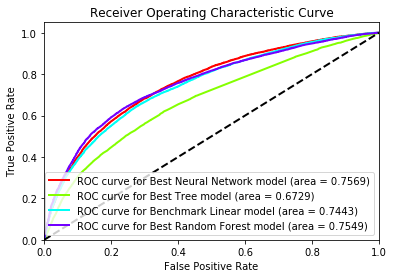

In [34]:
#AUC comparision
#first, load the predictions from the other models
dt_best_preds = joblib.load("data/processed/dt_probs.pkl")
lin_probs = joblib.load("data/processed/linear_probs.pkl")
rf_probs = joblib.load("data/processed/rf_probs.pkl")
roc_plot(test["labels"], [preds, dt_best_preds, lin_probs, rf_probs],
         ["Best Neural Network", "Best Tree", "Benchmark Linear", "Best Random Forest"], 'reports/figures/ROC_nn.svg')

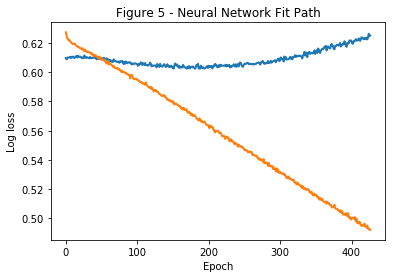

In [39]:
#validation vs train loss
epochs = range(0,len(hist_list[2]["val_loss"]))
plt.plot(epochs, hist_list[2]["val_loss"], lw=2, label='Validation')
plt.plot(epochs, hist_list[2]["loss"], lw=2, label='Train')
plt.xlabel('Epoch')
plt.ylabel('Log loss')
plt.title('Figure 5 - Neural Network Fit Path')
plt.savefig("reports/figures/nn_loss_path.svg")

# 7 - Evaluate on quotes
Let us see what the model thinks of some of the top quotes from https://www.brainyquote.com/top_100_quotes.

In [89]:
unfunny_quotes = ["Find a place inside where there's joy, and the joy will burn out the pain.",
          "Try to be a rainbow in someone's cloud.",
          "It is during our darkest moments that we must focus to see the light.",
         "Keep love in your heart. A life without it is like a sunless garden when the flowers are dead.",
         "The best and most beautiful things in the world cannot be seen or even touched - they must be felt with the heart."]

In [41]:
#now need to convert to seqs
#load neuralnetowrk vocab
vocab = joblib.load("data/interim/nn_vocab.pkl")

In [42]:
def create_seqs(texts, vocab, max_len):
    tokens = []
    for text in texts:
        tokens.append(wordpunct_tokenize(text.lower()))
    seqs = np.zeros((len(tokens), max_len), dtype=np.int32)
    
    for i, text in enumerate(tokens):
        for j, word in enumerate(text):
            if j >= max_len:
                break
            #need to increment by 1 since first row in embedding matrix is reserved
            #if word doesn't exist, it will return -1, whicll be incrmented to 1
            seqs[i,j] = vocab.get(word, -1) + 2
    return seqs

In [78]:
#make seqss
unfunny_seqs = create_seqs(unfunny_quotes, vocab, 300)
unfunny_seqs

array([[ 9641,  1112, 18217, ...,     0,     0,     0],
       [25191, 24674,  2986, ...,     0,     0,     0],
       [13207, 13171,  8219, ...,     0,     0,     0],
       [13638, 14662, 12592, ...,     0,     0,     0],
       [24349,  3225,  1888, ...,     0,     0,     0]])

In [85]:
#now predict
unfunny_quote_probs = np.squeeze(model50_trained.predict(unfunny_seqs, batch_size = 2000))
unfunny_quote_probs

array([ 0.28092721,  0.29726008,  0.5709604 ,  0.37078726,  0.19481923], dtype=float32)

In [90]:
unfunny_results = pd.DataFrame({"text": unfunny_quotes, "prediction": unfunny_quote_probs})
unfunny_results.to_csv("data/processed/unfunny_quotes.csv")
unfunny_results

,prediction,text
0,0.280927,"Find a place inside where there's joy, and the..."
1,0.297260,Try to be a rainbow in someone's cloud.
2,0.570960,It is during our darkest moments that we must ...
3,0.370787,Keep love in your heart. A life without it is ...
4,0.194819,The best and most beautiful things in the worl...


In [69]:
#now somme funny quotes from http://www.coolfunnyquotes.com/category/top-100-funny-quotes/
funny_quotes = ["If I won the award for laziness, I would send somebody to pick it up for me.",
          "Me and my bed are perfect for each other, but my alarm clock keeps trying to break us up.",
         "If we shouldn't eat at night, why is there a light in the fridge?",
         "Sometimes I wish I was an octopus, so I could slap eight people at once.",
         "Some people are like clouds. When they go away, it's a brighter day."]
funny_seqs = create_seqs(funny_quotes, vocab, 300)
funny_seqs
#now predict
funny_quote_probs = np.squeeze(model50_trained.predict(funny_seqs, batch_size = 2000))

In [70]:
funny_quotes = pd.DataFrame({"text": funny_quotes, "prediction": funny_quote_probs})
funny_quotes.to_csv("data/processed/funny_quotes.csv")
funny_quotes

,prediction,text
0,0.762339,"If I won the award for laziness, I would send ..."
1,0.698758,"Me and my bed are perfect for each other, but ..."
2,0.779744,"If we shouldn't eat at night, why is there a l..."
3,0.765071,"Sometimes I wish I was an octopus, so I could ..."
4,0.765436,Some people are like clouds. When they go away...
